### Student Information
Name:蔡濬安

Student ID:109062513

GitHub ID:AndrewTsai0406

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2
"""
Open three files of survey and put them together as a Data frame
    1.Data Source
    2.Data Preparation
    3.Data Transformation
        3.1 Converting Dictionary into Pandas dataframe
        3.2 Familiarizing yourself with the Data
"""

import pandas as pd
text1=open('imdb_labelled',encoding='utf-8').read()
text2=open('amazon_cells_labelled',encoding='utf-8').read()
text3=open('yelp_labelled',encoding='utf-8').read()
df_imbd=pd.DataFrame([i.split('\t')for i in text1.split('\n')][:-1]).set_axis(['comments','preference'],axis=1)
df_amazon=pd.DataFrame([i.split('\t')for i in text2.split('\n')][:-1]).set_axis(['comments','preference'],axis=1)
df_yelp=pd.DataFrame([i.split('\t')for i in text3.split('\n')][:-1]).set_axis(['comments','preference'],axis=1)
df_imbd['company'],df_amazon['company'],df_yelp['company']=\
    pd.Series(['imdb' for _ in range(1000)],name='company')\
    ,pd.Series(['amazon' for _ in range(1000)],name='company')\
    ,pd.Series(['yelp' for _ in range(1000)],name='company')
df=pd.concat([df_imbd,df_amazon,df_yelp])
print(df)

                                              comments preference company
0    A very, very, very slow-moving, aimless movie ...          0    imdb
1    Not sure who was more lost - the flat characte...          0    imdb
2    Attempting artiness with black & white and cle...          0    imdb
3         Very little music or anything to speak of.            0    imdb
4    The best scene in the movie was when Gerardo i...          1    imdb
..                                                 ...        ...     ...
995  I think food should have flavor and texture an...          0    yelp
996                           Appetite instantly gone.          0    yelp
997  Overall I was not impressed and would not go b...          0    yelp
998  The whole experience was underwhelming, and I ...          0    yelp
999  Then, as if I hadn't wasted enough of my life ...          0    yelp

[3000 rows x 3 columns]


In [2]:
"""
    4.Data Mining using Pandas
        4.1 Dealing with Missing Values
        4.2 Dealing with Duplicate Data
"""
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))
df.drop_duplicates(keep=False, inplace=True)

<AxesSubplot:title={'center':'Category distribution'}>

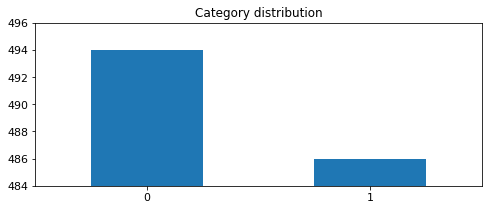

In [3]:
"""
5.Data Preprocessing
    5.1 Sampling
    5.2 Feature Creation
    5.3 Feature Subset Selection
    5.4 Dimensionality Reduction
    5.5 Atrribute Transformation / Aggregation
    5.6 Discretization and Binarization
"""
import matplotlib.pyplot as plt
%matplotlib inline

df_sample = df.sample(n=1000)
df[df.company=='amazon'].preference.value_counts().plot(kind = 'bar',
                                  title = 'Category distribution',
                                  ylim = [min(df[df.company=='amazon']\
                                              .preference.value_counts())-2,
                                          max(df[df.company=='amazon']\
                                              .preference.value_counts())+2],
                                  rot = 0, fontsize = 11, figsize = (8,3))


<AxesSubplot:title={'center':'Category distribution'}>

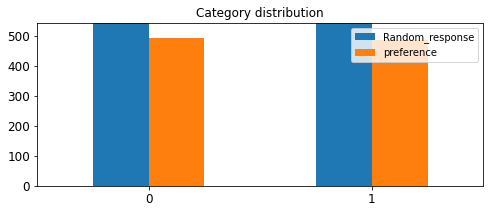

In [4]:
random_series=pd.Series({'0':580,'1':550},name='Random_response')
df1=pd.concat([random_series,df[df.company=='amazon'].preference.value_counts()],axis=1)

df1.plot(kind = 'bar',
         title = 'Category distribution',
         ylim = [0,max(df[df.company=='amazon'].preference.value_counts())+50],
         rot = 0,
         fontsize = 12,
         figsize = (8,3))

In [5]:
"""Tokenization"""
import nltk
nltk.download('punkt')
toekn_df=df.comments.apply(lambda x: dmh.tokenize_text(x))
print(toekn_df)

[nltk_data] Downloading package punkt to /home/andrew/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0      [A, very, ,, very, ,, very, slow-moving, ,, ai...
1      [Not, sure, who, was, more, lost, -, the, flat...
2      [Attempting, artiness, with, black, &, white, ...
3      [Very, little, music, or, anything, to, speak,...
4      [The, best, scene, in, the, movie, was, when, ...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: comments, Length: 2966, dtype: object


In [6]:
"""Tokenization"""
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comments)
analyze=count_vect.build_analyzer()
analyze(' '.join(list(df[0:1].comments)))

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [7]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [8]:
"""Dimensionality Reduction"""
from sklearn.decomposition import PCA
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced

array([[-0.82827104, -0.24596077],
       [ 1.25850777, -0.94356437],
       [ 2.94134996,  0.88869002],
       ...,
       [-0.50570316,  0.41593819],
       [ 0.49212522,  0.36942182],
       [ 2.3271978 , -0.47735246]])

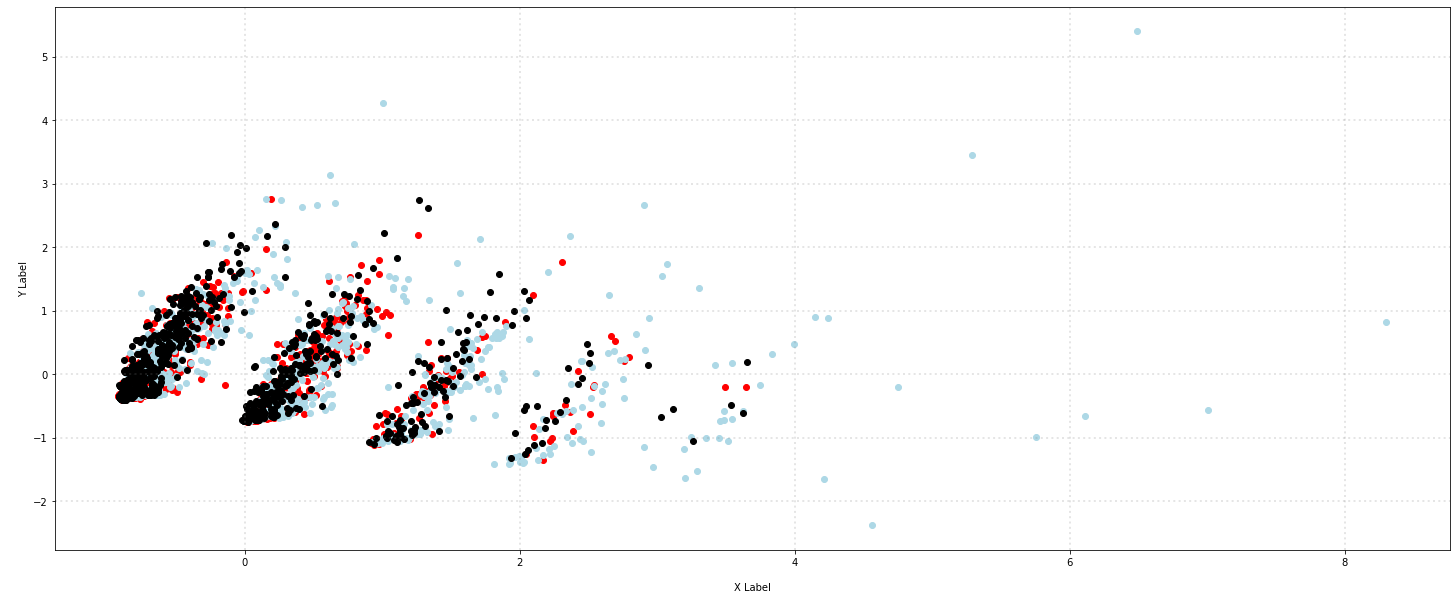

In [9]:
"""Plotting out the df_reduced"""
col = ['red', 'lightblue', 'black']
categories=['yelp','imdb','amazon']
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, cat in zip(col, categories):
    xs = df_reduced[df['company'] == cat].T[0]
    ys = df_reduced[df['company'] == cat].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

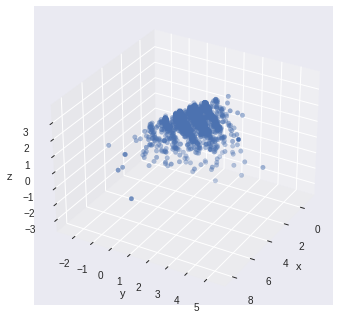

In [10]:
"""Plotting out the 3D df_reduced"""
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())
import matplotlib as mpl  # noqa
from mpl_toolkits.mplot3d import Axes3D  # noqa
import matplotlib.pyplot as plt
import numpy as np

x,y,z = df_reduced[:,0],df_reduced[:,1],df_reduced[:,2]
mpl.style.use('seaborn')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
elev = 30
azim = 30
ax.view_init(elev, azim)

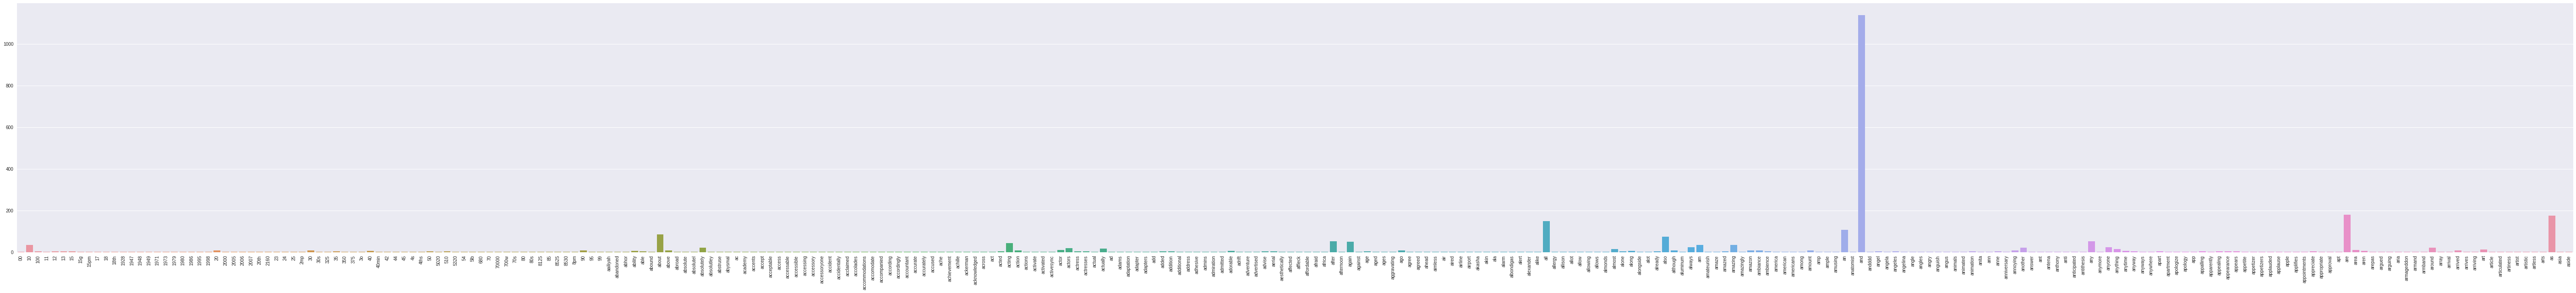

In [11]:
"""Atrribute Transformation / Aggregation"""
import seaborn as sns
import numpy as np
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980')]

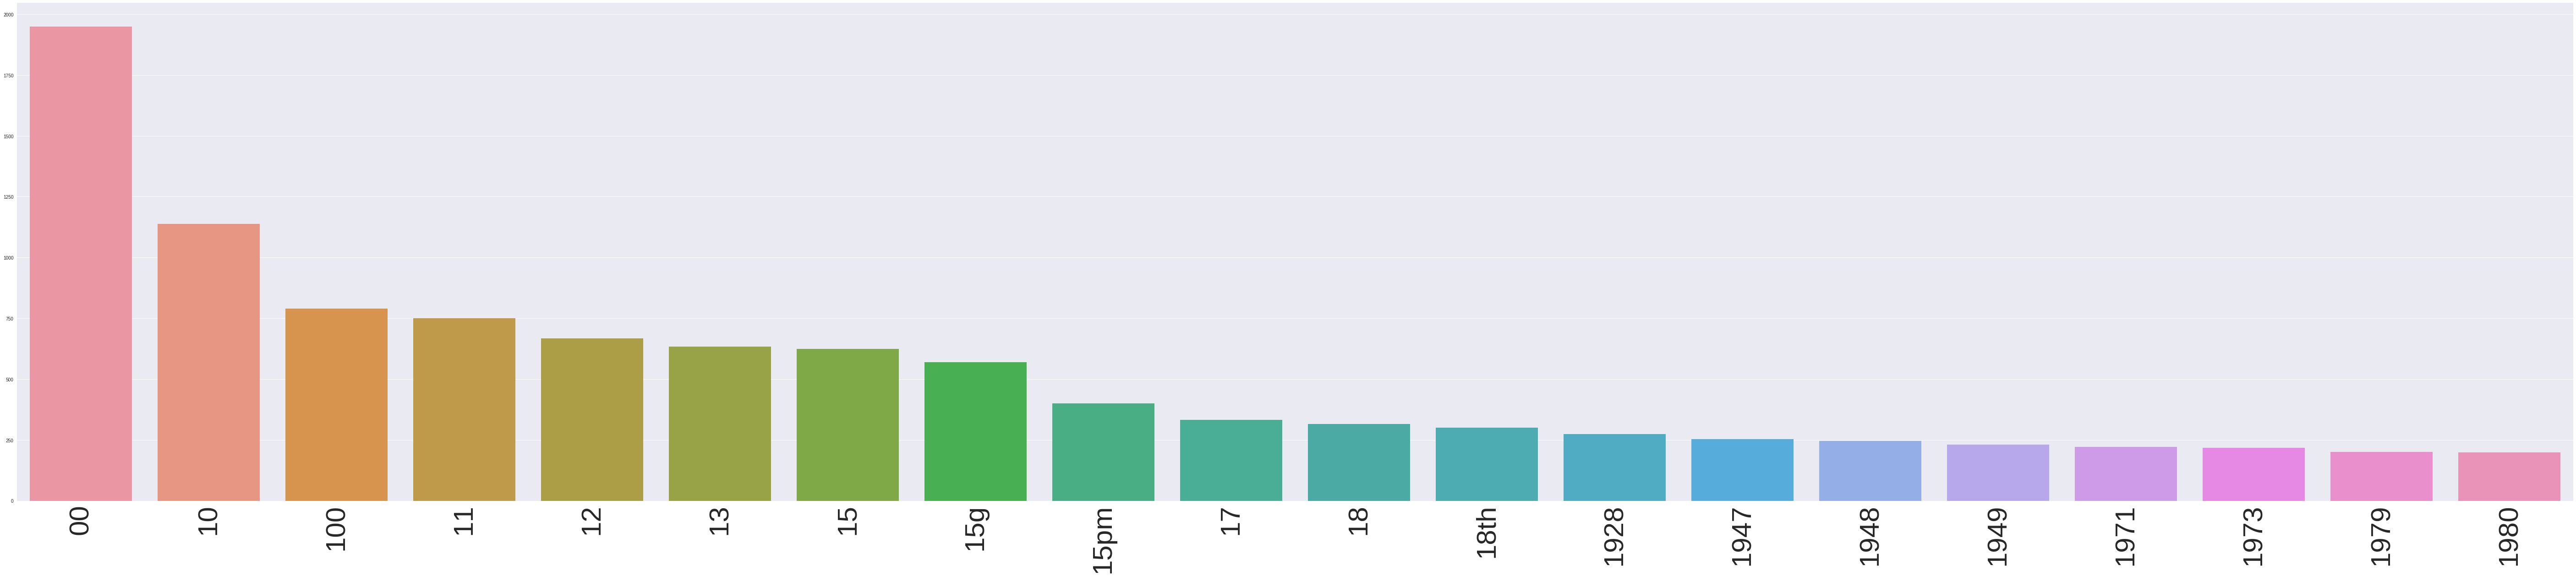

In [12]:
"""An incline graph goes by their frequencies"""
plt.subplots(figsize=(100, 20))
x_input=count_vect.get_feature_names()[:20]
term_frequencies.sort()
g = sns.barplot(x=x_input, y=term_frequencies[::-1][:20])

g.set_xticklabels(x_input, rotation = 90,fontsize=60)

In [13]:
"""Discretization and Binarization using the names of different companies"""

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
s=set()
for name in df.company:
    if not name in s:
        s.add(name)
d={}
for i,item in enumerate(s):
    d[item]=i

series=pd.Series(list(map(lambda x:d[x],df.company)))
mlb_1 = preprocessing.LabelBinarizer()
mlb_1.fit(series)
df['bin_category'] = mlb_1.transform(series).tolist()
df

,comments,preference,company,bin_category
0,"A very, very, very slow-moving, aimless movie ...",0,imdb,"[0, 0, 1]"
1,Not sure who was more lost - the flat characte...,0,imdb,"[0, 0, 1]"
2,Attempting artiness with black & white and cle...,0,imdb,"[0, 0, 1]"
3,Very little music or anything to speak of.,0,imdb,"[0, 0, 1]"
4,The best scene in the movie was when Gerardo i...,1,imdb,"[0, 0, 1]"
...,...,...,...,...
995,I think food should have flavor and texture an...,0,yelp,"[1, 0, 0]"
996,Appetite instantly gone.,0,yelp,"[1, 0, 0]"
997,Overall I was not impressed and would not go b...,0,yelp,"[1, 0, 0]"
998,"The whole experience was underwhelming, and I ...",0,yelp,"[1, 0, 0]"


In [14]:
"""6. Data Exploration"""

'6. Data Exploration'

Third: please attempt the following tasks on the new dataset. This part is worth 30% of your grade.

-Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

-Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

-Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.


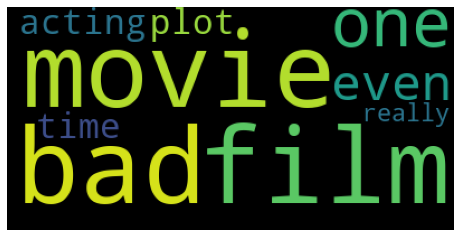

In [16]:
"""
The code below trys to extract the most meaningful 
information from the comments of specified companies.
Here we have imdb as an example.
"""

def to_output_frequency(df,value):
    """return the most used words of specified value from the column for further visualizations"""
    from sklearn.feature_extraction.text import CountVectorizer 

    count_vect = CountVectorizer()
    df_counts = count_vect.fit_transform(df.comments)
    analyze=count_vect.build_analyzer()
    d={}
    for word in analyze(' '.join(list(df.comments))):
        if word in d.keys():
            d[word]+=1
        else:
            d[word]=1
    return {k: v for k, v in sorted(d.items(), key=lambda item: item[1])[::-1]}

def to_remove_stop_words(dictionary,stop_words):
    """Remove stop words from the dictionary"""
    for item in list(dictionary):
        if item in stop_words:
            dictionary.pop(item,None)

df_imbd_0=df[df.company=='imdb']
df_imbd_0=df_imbd_0[df_imbd_0.preference =='0']

df_imbd_1=df[df.company=='imdb']
df_imbd_1=df_imbd_1[df_imbd_1.preference =='1']    

a=to_output_frequency(df_imbd_0,0)
b=to_output_frequency(df_imbd_1,1)
English_stop_words=open('English_stop_words').read().split('\n')

to_remove_stop_words(a,English_stop_words)
to_remove_stop_words(b,English_stop_words)
"""
Here I plot out the most frequent words from the comments 
which tells us what things people tend to care more about the most.

In this case, we learned that acting, plots and scripts are in some 
people's minds the determined factor of what good movies should have.
"""
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.imshow(WordCloud().generate(' '.join(list(a)[:10])
))
plt.axis("off")
plt.show()


In [17]:
"""Generate TF-IDF features from the tokens of each text."""
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df.comments.to_list()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names())
print(X.shape)

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations', 'accomodate', 'accompanied', 'according', 'accordingly', 'accountant', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', '

In [18]:
"""Do reduction on TF-IDF features"""
X_reduced = PCA(n_components = 500).fit_transform(X.toarray())
print(X_reduced,end='\n\n')
"""Do reduction on conut features"""
df_reduced = PCA(n_components = 500).fit_transform(df_counts.toarray())
print(df_reduced)

[[ 5.96256864e-02  6.69323204e-03  1.48607139e-01 ... -2.24977159e-02
   3.15501875e-02 -6.08370340e-03]
 [ 8.68214680e-02  1.24606447e-03 -1.08982502e-01 ... -1.75675425e-02
  -2.17111361e-02  6.08875341e-03]
 [ 1.40803129e-01 -5.09855602e-02 -7.23195130e-02 ...  2.63649620e-03
   1.02505732e-04  4.79563704e-03]
 ...
 [ 6.23579920e-03  2.15040905e-01  1.29700662e-02 ... -5.98297482e-03
   1.27074960e-03  5.88212669e-04]
 [ 4.88220028e-02  7.50055043e-02 -6.73038374e-02 ...  1.93540923e-02
  -1.38603326e-02  6.98005347e-03]
 [ 2.37966764e-02 -9.33948272e-03 -1.55900422e-01 ...  1.34650151e-02
  -1.52733051e-03  2.55877444e-03]]

[[-8.28271129e-01 -2.45957521e-01  3.00770256e-01 ... -2.32325036e-02
  -3.14521448e-02 -5.01844088e-02]
 [ 1.25850781e+00 -9.43554084e-01 -1.30184928e-02 ...  1.16132218e-01
   3.22150571e-02  2.57478055e-02]
 [ 2.94134991e+00  8.88678557e-01  1.83094843e+00 ...  1.38915829e-03
  -4.02560097e-02  4.20335407e-02]
 ...
 [-5.05703075e-01  4.15960126e-01  6.705267

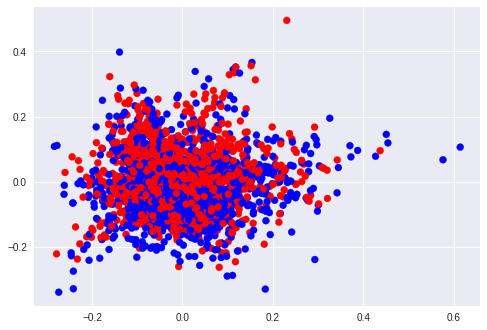

In [19]:
b = PCA(n_components = 2).fit_transform(X.toarray())
plt.scatter(b[:,0],b[:,1],c=list(map(lambda x:'red' if x =='0' else 'blue',df.preference.to_list())))

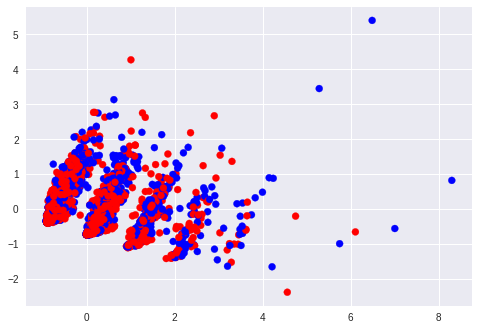

In [20]:
a = PCA(n_components = 2).fit_transform(df_counts.toarray())
plt.scatter(a[:,0],a[:,1],c=list(map(lambda x:'red' if x =='0' else 'blue',df.preference.to_list())))

gnb.score with count-based method=  0.6388140161725068
bnb.score with count-based method=  0.6347708894878706


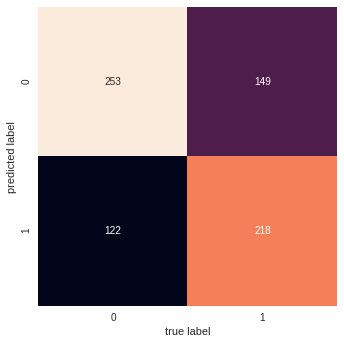

In [21]:
"""
Implement a simple Naive Bayes classifier that automatically classifies 
the records into their categories. 
Use both the TF-IDF features and word frequency features to build two seperate classifiers. 
"""
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, Y_train, Y_test = train_test_split(df_reduced, list(map(lambda x:int(x),df.preference.to_list())), test_size=0.25)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)
print('gnb.score with count-based method= ',gnb.score(X_test, Y_test))
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print('bnb.score with count-based method= ',bnb.score(X_test, Y_test))

labels = bnb.predict(X_test)
mat = confusion_matrix(Y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

gnb.score with TF-IDF method=  0.6563342318059299
bnb.score with TF-IDF method=  0.6738544474393531


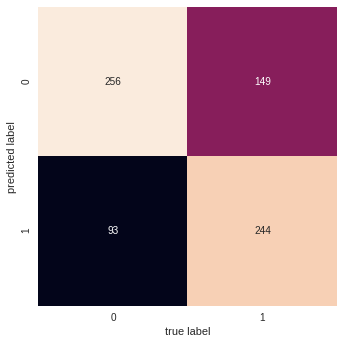

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, list(map(lambda x:int(x),df.preference.to_list())), test_size=0.25)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)
print('gnb.score with TF-IDF method= ',gnb.score(X_test, Y_test))
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print('bnb.score with TF-IDF method= ',bnb.score(X_test, Y_test))

labels = bnb.predict(X_test)
mat = confusion_matrix(Y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

About how tf-idf differs from tf in text classification with Bayes classifier, I guess in this example it doesn't matter a lot becuase we can't extract more information about the text either way based on what my experiment indictes above. In other words, contents that have similar meanings don't get closer or have smaller angles at space by idf operation.(Please sent massage to this e-mail:tic294boon901@gmail.com if I am very wrong before my score get deducted thank you QQ. Please don't deduct the score)

The difference of TF and TF/IDF is on whether the corpus-frequencies of words are used or not. The TF/IDF is by far a better choice, independent of classifier.

Using only TF we don't really care if a word is common or not. Thus, common words like e.g. articles receive a large weight even if they contribute no real information.

In TF/IDF the more frequent a word is in the corpus, the smaller weight it receives. Thus, common words like articles receive small weights but rare words, that it is assumed to carry more information, receive larger weights.

If the cosine similarity between rows is used, then the scaling matters - cosine similarity is not invariant to scaling. Without idf, the numbber of times "the" is used, can dominate the similarity.

------------------------------------------------------------------------------------------------------

#Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade:


A:
With the heap map example provided in DM2020-Lab1-Master, I notice that it's not very eifficent in terms of visual communication because each text has only one unique value associated with. Also, the graph is extremely sparse, it would be difficult for whoever try to see the whole chart. If I were to communicate this, I would chose word cloud to emphasize on special attributes from diffrent categories.